**Linear Regression**

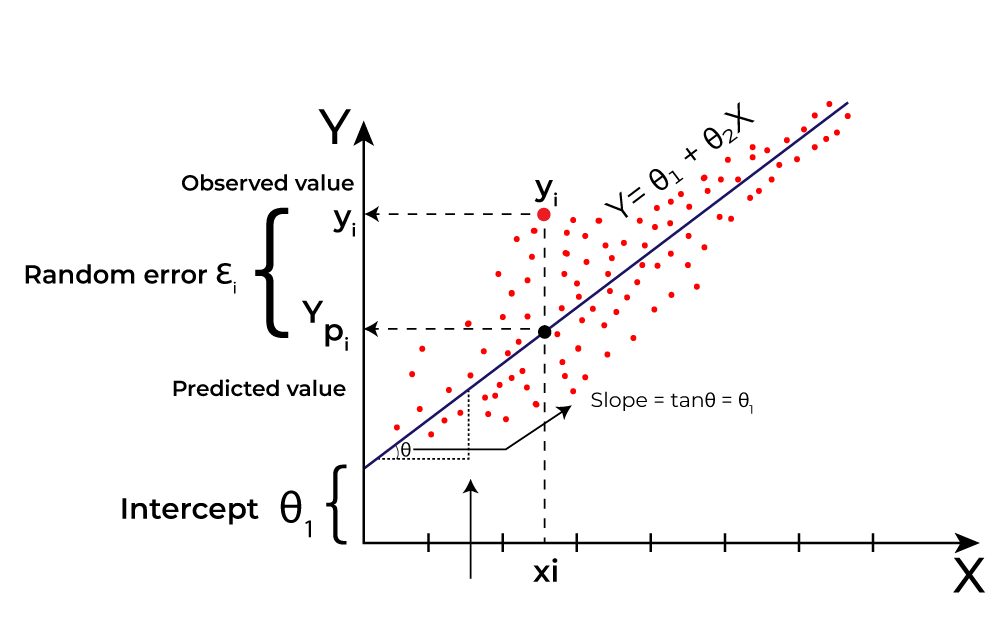

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation


In [ ]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
data = pd.read_csv(url)
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [ ]:
# Drop the missing values
data = data.dropna()

# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)


In [ ]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (predictions-train_output)
        # dm= 2/n * mean of (predictions-actual) * input
        dm = 2 * np.mean(np.multiply(train_input, df))
        # dc = 2/n * mean of (predictions-actual)
        dc = 2 * np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):
        # Initialize random parameters
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        # Initialize loss
        self.loss = []

        # Initialize figure and axis for animation
        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals +
                        self.parameters['c'], color='red', label='Regression Line')
        ax.scatter(train_input, train_output, marker='o',
                color='green', label='Training Data')

        # Set y-axis limits to exclude negative values
        ax.set_ylim(0, max(train_output) + 1)

        def update(frame):
            # Forward propagation
            predictions = self.forward_propagation(train_input)

            # Cost function
            cost = self.cost_function(predictions, train_output)

            # Back propagation
            derivatives = self.backward_propagation(
                train_input, train_output, predictions)

            # Update parameters
            self.update_parameters(derivatives, learning_rate)

            # Update the regression line
            line.set_ydata(self.parameters['m']
                        * x_vals + self.parameters['c'])

            # Append loss and print
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(frame + 1, cost))

            return line,
        # Create animation
        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)

        # Save the animation as a video file (e.g., MP4)
        ani.save('linear_regression_A.gif', writer='ffmpeg')

        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()

        return self.parameters, self.loss


Iteration = 1, Loss = 8133.541267753612
Iteration = 1, Loss = 987.1155410204474
Iteration = 1, Loss = 125.89346304907653
Iteration = 1, Loss = 22.10682451444717
Iteration = 2, Loss = 9.59939934801999
Iteration = 3, Loss = 8.09211275406237
Iteration = 4, Loss = 7.910462569479938
Iteration = 5, Loss = 7.888565999261982
Iteration = 6, Loss = 7.885921478698774
Iteration = 7, Loss = 7.885597040211398
Iteration = 8, Loss = 7.885552197441606
Iteration = 9, Loss = 7.885541049577256
Iteration = 10, Loss = 7.885533962894362
Iteration = 11, Loss = 7.885527366206639
Iteration = 12, Loss = 7.885520829147214
Iteration = 13, Loss = 7.885514299852135
Iteration = 14, Loss = 7.885507772071173
Iteration = 15, Loss = 7.885501245051049
Iteration = 16, Loss = 7.885494718700933
Iteration = 17, Loss = 7.885488193009809
Iteration = 18, Loss = 7.885481667976304
Iteration = 19, Loss = 7.885475143600185
Iteration = 20, Loss = 7.885468619881371


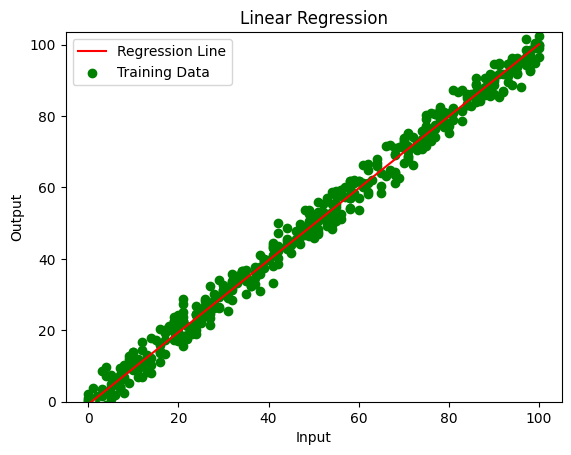

In [ ]:
#Example usage
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)
